In [1]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib

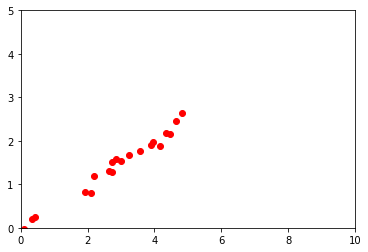

In [21]:
np.random.seed(0)

true_w = 0.5
true_sigma = 0.1

num_obs = 20
X_obs = np.random.uniform(low=0, high=5, size=num_obs)
noise = np.random.normal(loc=0, scale=true_sigma, size=num_obs)
y_obs = true_w * X_obs + noise

xs = np.linspace(0, 5, 1000)
plt.scatter(X_obs, y_obs, c='r', label='obs')
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.show()